In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

In [3]:
wine = load_wine()

In [4]:
A = wine.data

In [5]:
n = wine.data.shape[0]
d = wine.data.shape[1]

In [6]:
y = 1.0*np.ones([A.shape[0],])

In [7]:
for i in range(wine.target.shape[0]):
  if wine.target[i] != 1:
    y[i] = -1

In [8]:
indexarr = np.arange(n)
np.random.shuffle(indexarr)

In [9]:
print(indexarr)

[155  62 101  21 139 156 123  13 162  94  60 104 124  45  52  33 133 136
  65 131 143  43  29 134  93  67  61   6 114 175   8 173  96 107  12 141
  16  41 152  42 163  30  58  80  91  17   9  98  50   5 146 108 120  97
  49 161 165  89  81  14 115  85  48  68 153  11 148 130  69 111  57 119
 172 112  56  31  53   2  20 140 128 151 177  99  39  27 166 110  71 125
  28  82  26  37  32  10 106 160  46 142  66  40  55 109  44 121  25 164
 137  64 159  78  74 117 176 170  19 116 129 157  70  86  75  90 144   1
 127 171 150 168 132 174 158   3 122  18  15 118 147 113 103  79 105  34
  59  47  24  54  95 135 100  88 102  84  73  22 126  63  72 149 169 154
  83   0 138   4  36  38  23  92  87  77 145  35  51   7 167  76]


In [10]:
train_data = np.ones([int(len(indexarr)*0.8),A.shape[1]])

In [11]:
for i in range(int(len(indexarr)*0.8)):
  train_data[i] = A[indexarr[i]]

In [12]:
test_data = np.ones([int(len(indexarr)*0.2),A.shape[1]])

for i in range(int(len(indexarr)*0.2)):
  test_data[i] = A[indexarr[i + int(len(indexarr)*0.8)]]

In [13]:
train_label = np.ones([int(len(indexarr)*0.8),])

In [14]:
for i in range(int(len(indexarr)*0.8)):
  train_label[i] = y[indexarr[i]]

In [15]:
test_label = np.ones([int(len(indexarr)*0.2),])

for i in range(int(len(indexarr)*0.2)):
  test_label[i] = y[indexarr[i + int(len(indexarr)*0.8)]]

In [16]:
def predict(w, x):
  if np.matmul(w.transpose(),x)<0:
    return -1
  else:
    return 1

In [17]:
def compute_accuracy(data, labels, model_w):
  no_correct = 0
  for i in range(len(labels)):
    if predict(model_w, data[i]) == labels[i]:
      no_correct += 1
  return no_correct/len(labels)

In [18]:
def compute_orthogonal_projection(z):
  arr = np.ones(len(z))
  for i in range(len(z)):
    if z[i] > 1:
      arr[i] = 1
    elif z[i] < -1:
      arr[i] =  -1
    else:
      arr[i] =  z[i]
  return arr

In [19]:
def compute_loss_h(w, x, y):
  return max(0, 1 - np.multiply(y,np.matmul(w.transpose(),x)))

In [20]:
def compute_objfnval(data, labels, model_w, lamda):
  sum = 0
  for i in range(len(labels)):
    sum += compute_loss_h(model_w, data[i], labels[i])
  sum = sum/len(labels)
  sum += (lamda/2)*(np.linalg.norm(model_w))**2
  return sum

In [21]:
def compute_grad_loss_h(x, y, model_w, lamda):
  n = len(model_w)
  arr = np.ones(n)
  for i in range(n):
    if compute_loss_h(model_w, x, y) != 0:
      arr[i] = (lamda/n)*model_w[i] - y*x[i]
    else:
      arr[i] = (lamda/n)*model_w[i]
  return arr

In [22]:
def OPT1(data, label, lamda, num_epochs):
  t = 1
  obj_fn = []
  accuracy_test = []
  accuracy_train = []
  w = np.ones(data.shape[1])
  arr = np.arange(data.shape[0])
  for epoch in range(num_epochs):
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step = 1/t
      w = compute_orthogonal_projection(w - np.multiply(step, compute_grad_loss_h(data[i], label[i], w, lamda)))
      t = t + 1
      if t > 1e4:
        t = 1
    obj_fn.append(compute_objfnval(data, label, w, lamda))
    accuracy_test.append(compute_accuracy(test_data, test_label, w))
    accuracy_train.append(compute_accuracy(train_data, train_label, w))
  return w, accuracy_test, accuracy_train, obj_fn

In [ ]:
num_epochs = 500
lamdas = [1e-3,1e-2,0.1,1,10]
x_epochs = [i for i in range(1,501)]
obj_fnval_list = []
accuracy_train_list = []
accuracy_test_list = []
final_accuracy_test = []
final_accuracy_train = []

for i in lamdas:
  model_w, acc_test, acc_train, obj_fnval = OPT1(train_data, train_label, i, num_epochs)
  obj_fnval_list.append(obj_fnval)
  accuracy_train_list.append(acc_train)
  accuracy_test_list.append(acc_test)
  final_accuracy_test.append(compute_accuracy(test_data, test_label, model_w))
  final_accuracy_train.append(compute_accuracy(train_data, train_label, model_w))

#Ans 6(a) Plot of objective function values for different values of lambda

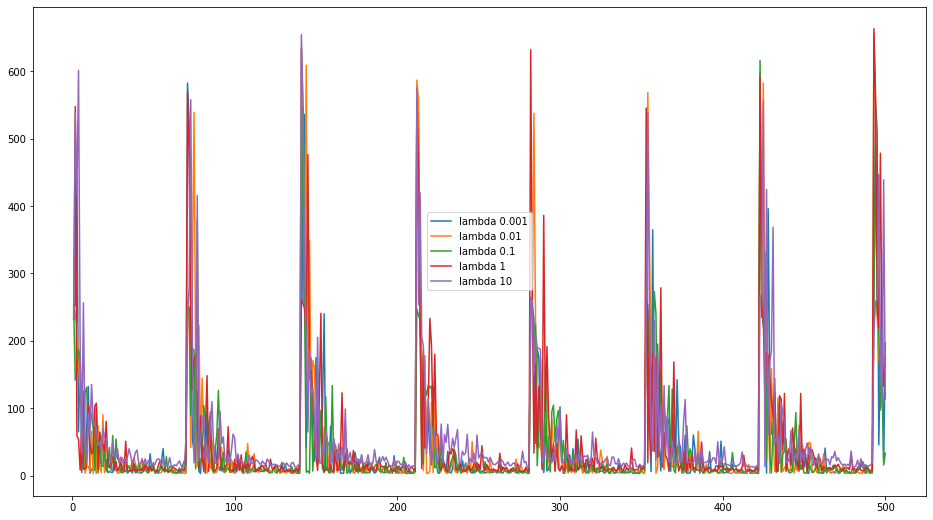

In [ ]:
plt.figure(figsize = (16,9))
for i in range(len(obj_fnval_list)):
  plt.plot(x_epochs, obj_fnval_list[i], label = 'lambda '+str(lamdas[i]))
plt.legend()
plt.show()

#Ans 6(b) Plot of test set accuracy values for different values of lambda

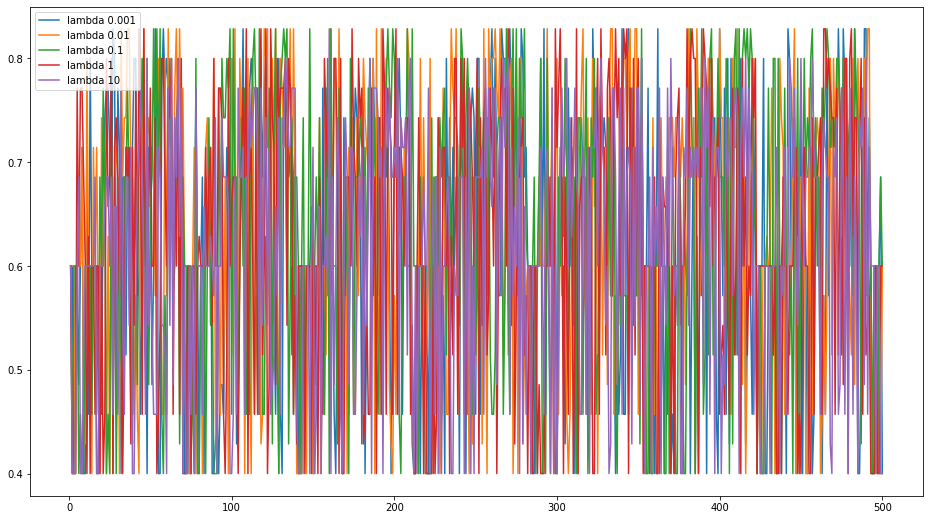

In [ ]:
plt.figure(figsize = (16,9))
for i in range(len(accuracy_test_list)):
  plt.plot(x_epochs, accuracy_test_list[i], label = 'lambda '+str(lamdas[i]))
plt.legend()
plt.show()

#Ans 6(c) Plot of train set accuracy values for different values of lambda

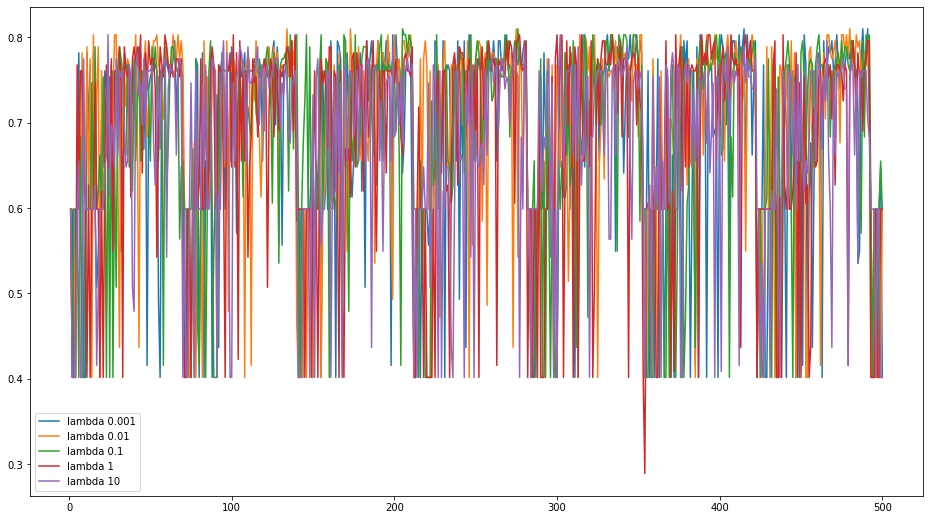

In [ ]:
plt.figure(figsize = (16,9))
for i in range(len(accuracy_train_list)):
  plt.plot(x_epochs, accuracy_train_list[i], label = 'lambda '+str(lamdas[i]))
plt.legend()
plt.show()

In [ ]:
final_accuracy_train

[0.4014084507042254,
 0.5985915492957746,
 0.5985915492957746,
 0.5985915492957746,
 0.4014084507042254]

In [ ]:
final_accuracy_test

[0.4, 0.6, 0.6, 0.6, 0.4]

#Ans 6 (d)

Train set accuracy values:

For lambda = 1e-3, 0.40

For lambda = 1e-2, 0.59

For lambda = 0.1, 0.59

For lambda = 1, 0.59

For lambda = 10, 0.40

Test set accuracy values:

For lambda = 1e-3, 0.4

For lambda = 1e-2, 0.6

For lambda = 0.1, 0.6

For lambda = 1, 0.6

For lambda = 10, 0.4

#Ans 6(e)

We can see that the curves for all values of lambda are very squiggly in nature and repeat after a certain no of epochs. We can see that for lambda = 0.01, 0.1, 1, we get better accuracy value. We can also see that the test accuracy is greater than train accuracy in some cases.

One more observation that has been made is the accuracy changes with every random split of data.

#Loss Function, $L_l$

In [ ]:
def compute_loss_l(w, x, y):
  return np.log(1 + np.exp(np.multiply(-y, np.matmul(w.transpose(), x))))

In [ ]:
def compute_objfnval(data, labels, model_w, lamda):
  sum = 0
  for i in range(len(labels)):
    sum += compute_loss_l(model_w, data[i], labels[i])
  sum = sum/len(labels)
  sum += (lamda/2)*(np.linalg.norm(model_w))**2
  return sum

In [ ]:
def compute_grad_loss_l(x, y, model_w, lamda):
  n = len(model_w)
  arr = np.ones(n)
  for i in range(n):
    arr[i] = (lamda/n)*model_w[i] + np.divide((np.multiply((np.exp(np.multiply(-y,np.matmul(model_w,x)))),np.multiply(-y,x[i]))), 1 + (np.exp(np.multiply(-y,np.matmul(model_w,x)))))
  return arr

In [ ]:
def OPT2(data, label, lamda, num_epochs):
  t = 1
  obj_fn = []
  accuracy_test = []
  accuracy_train = []
  w = np.ones(data.shape[1])
  arr = np.arange(data.shape[0])
  for epoch in range(num_epochs):
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step = 1/t
      w = w - np.multiply(step, compute_grad_loss_l(data[i], label[i], w, lamda))
      t = t + 1
      if t > 1e4:
        t = 1
    obj_fn.append(compute_objfnval(data, label, w, lamda))
    accuracy_test.append(compute_accuracy(test_data, test_label, w))
    accuracy_train.append(compute_accuracy(train_data, train_label, w))
  return w, accuracy_test, accuracy_train, obj_fn

In [ ]:
num_epochs = 500
lamdas = [1e-3,1e-2,0.1,1,10]
x_epochs = [i for i in range(1,501)]
obj_fnval_list = []
accuracy_train_list = []
accuracy_test_list = []
final_accuracy_test = []
final_accuracy_train = []

for i in lamdas:
  model_w, acc_test, acc_train, obj_fnval = OPT2(train_data, train_label, i, num_epochs)
  obj_fnval_list.append(obj_fnval)
  accuracy_train_list.append(acc_train)
  accuracy_test_list.append(acc_test)
  final_accuracy_test.append(compute_accuracy(test_data, test_label, model_w))
  final_accuracy_train.append(compute_accuracy(train_data, train_label, model_w))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


#Ans 7

We get an increasing function of the loss hence we get an error of overflow, so logistic function cannot be applied in this case.

#Loss Function $L_{sh}$

In [23]:
def compute_loss_sh(w, x, y):
  return (max(0, 1 - np.multiply(y, np.matmul(w.transpose(), x)))**2)

In [24]:
def compute_objfnval(data, labels, model_w, lamda):
  sum = 0
  for i in range(len(labels)):
    sum += compute_loss_sh(model_w, data[i], labels[i])
  sum = sum/len(labels)
  sum += (lamda/2)*(np.linalg.norm(model_w))**2
  return sum

In [25]:
def compute_grad_loss_sh(x, y, model_w, lamda):
  n = len(model_w)
  arr = np.ones(n)
  for i in range(n):
    if compute_loss_sh(model_w, x, y) != 0:
      arr[i] = (lamda/n)*model_w[i] + np.multiply(-2*y*x[i],max(0, 1 - np.multiply(y, np.matmul(model_w.transpose(), x))))
    else:
      arr[i] = (lamda/n)*model_w[i]
  return arr

In [26]:
def OPT3(data, label, lamda, num_epochs):
  t = 1
  obj_fn = []
  accuracy_test = []
  accuracy_train = []
  w = np.ones(data.shape[1])
  arr = np.arange(data.shape[0])
  for epoch in range(num_epochs):
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step = 1/t
      w = compute_orthogonal_projection(w - np.multiply(step, compute_grad_loss_sh(data[i], label[i], w, lamda)))
      t = t + 1
      if t > 1e4:
        t = 1
    obj_fn.append(compute_objfnval(data, label, w, lamda))
    accuracy_test.append(compute_accuracy(test_data, test_label, w))
    accuracy_train.append(compute_accuracy(train_data, train_label, w))
  return w, accuracy_test, accuracy_train, obj_fn

In [27]:
num_epochs = 500
lamdas = [1e-3,1e-2,0.1,1,10]
x_epochs = [i for i in range(1,501)]
obj_fnval_list = []
accuracy_train_list = []
accuracy_test_list = []
final_accuracy_test = []
final_accuracy_train = []

for i in lamdas:
  model_w, acc_test, acc_train, obj_fnval = OPT3(train_data, train_label, i, num_epochs)
  obj_fnval_list.append(obj_fnval)
  accuracy_train_list.append(acc_train)
  accuracy_test_list.append(acc_test)
  final_accuracy_test.append(compute_accuracy(test_data, test_label, model_w))
  final_accuracy_train.append(compute_accuracy(train_data, train_label, model_w))

#Ans 7.6(a) Plot of objective function values for different values of lambda

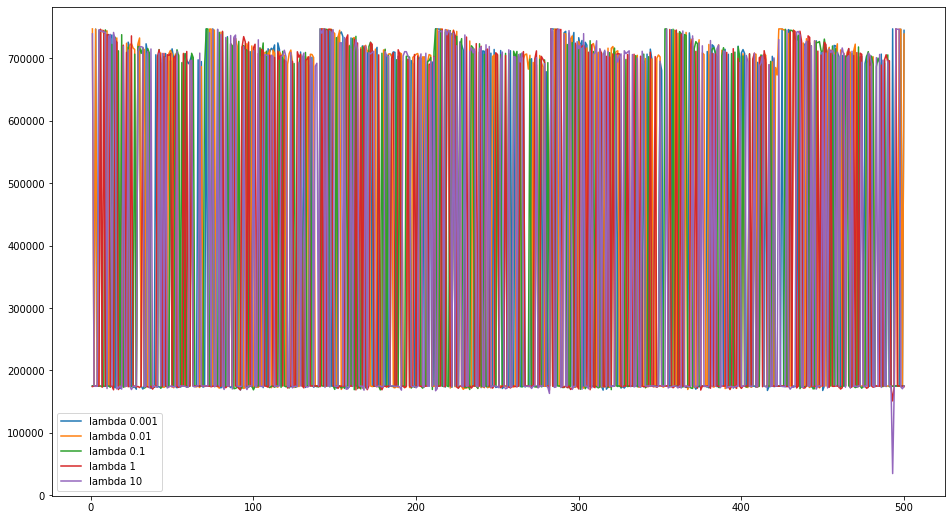

In [28]:
plt.figure(figsize = (16,9))
for i in range(len(obj_fnval_list)):
  plt.plot(x_epochs, obj_fnval_list[i], label = 'lambda '+str(lamdas[i]))
plt.legend()
plt.show()

#Ans 7.6(b) Plot of test set accuracy values for different values of lambda

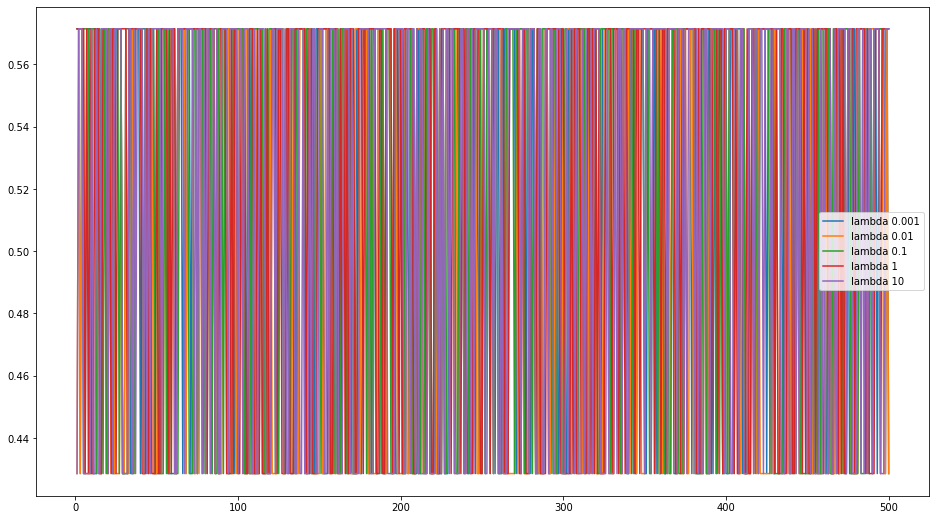

In [29]:
plt.figure(figsize = (16,9))
for i in range(len(accuracy_test_list)):
  plt.plot(x_epochs, accuracy_test_list[i], label = 'lambda '+str(lamdas[i]))
plt.legend()
plt.show()

#Ans 7.6(c) Plot of train set accuracy values for different values of lambda

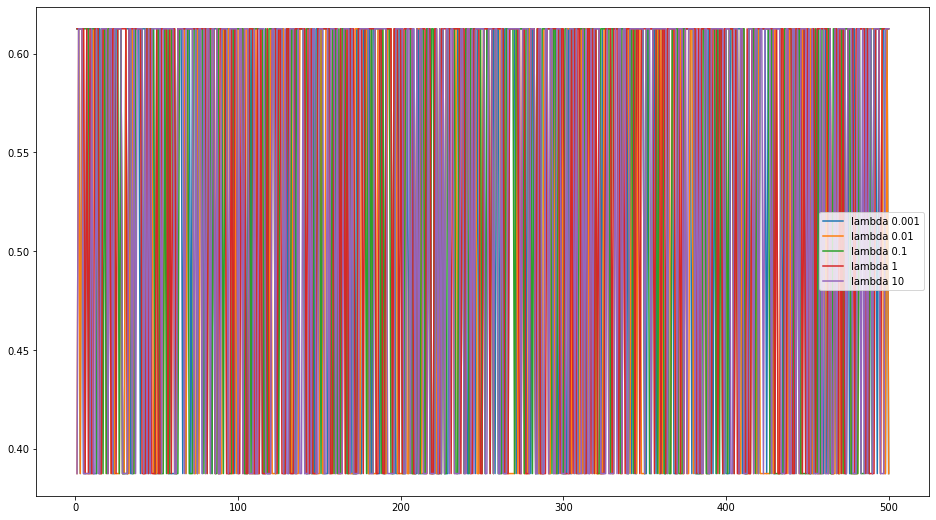

In [30]:
plt.figure(figsize = (16,9))
for i in range(len(accuracy_train_list)):
  plt.plot(x_epochs, accuracy_train_list[i], label = 'lambda '+str(lamdas[i]))
plt.legend()
plt.show()

In [31]:
final_accuracy_train

[0.3873239436619718,
 0.3873239436619718,
 0.6126760563380281,
 0.6126760563380281,
 0.6126760563380281]

In [32]:
final_accuracy_test

[0.42857142857142855,
 0.42857142857142855,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714]

#Ans 7.6 (d)

Train set accuracy values:

For lambda = 1e-3, 0.3873

For lambda = 1e-2, 0.3873

For lambda = 0.1, 0.6126

For lambda = 1, 0.6126

For lambda = 10, 0.6126

Test set accuracy values:

For lambda = 1e-3, 0.4285

For lambda = 1e-2, 0.4285

For lambda = 0.1, 0.5714

For lambda = 1, 0.5714

For lambda = 10, 0.5714

#Ans 7.6(e)

We can see that the objective function value curve is squiggly and repeats after certain no of epochs.

We can see that the accuracy curves for all values of lambda remain in a range. We can see that for the largest value of lambda, we get higher accuracy value with no pattern in the values. We can also see that the test accuracy is greater than train accuracy in some cases.

One more observation that has been made is the accuracy changes with every random split of data.